In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from scipy.stats import normaltest
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import sem
from numpy import mean
from numpy import sqrt
sns.set(font_scale=1.3)

In [37]:
files = os.listdir()

In [38]:
def tolerance_interval(data, con=0.95, cov=0.95):
    """
    From https://machinelearningmastery.com/statistical-tolerance-intervals-in-machine-learning/
    From https://www.itl.nist.gov/div898/handbook/prc/section2/prc263.htm
    Calculates the 2-sided tolerance interval using Howe's method. Does not use Guenther's k2 correction.

    params: 
            data: array-like. normally distributed continuous data
            con: level of confidence to achieve. Defaults to 0.95
            cov: percent of population covered by the interval. Defaults to 0.95
    Returns:
            lower bound, upper bound
    """

    # specify degrees of freedom
    n = len(data)
    dof = n - 1
    # specify data coverage
    cov_inv = (1.0 - cov) / 2.0
    gauss_critical = norm.isf(cov_inv)
    #specify confidence
    chi_critical = chi2.isf(q=con, df=dof)
    # k_2
    k_2 = gauss_critical * sqrt((dof * (1 + (1/n))) / chi_critical)
    # summarize
    data_mean = mean(data)
    data_std = np.std(data)
    lower, upper = data_mean-(k_2*data_std), data_mean+(k_2*data_std)
    return lower, upper

In [39]:
df_list = []
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        slide_type = file[:-4]
        df['slide_type'] = slide_type
        df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

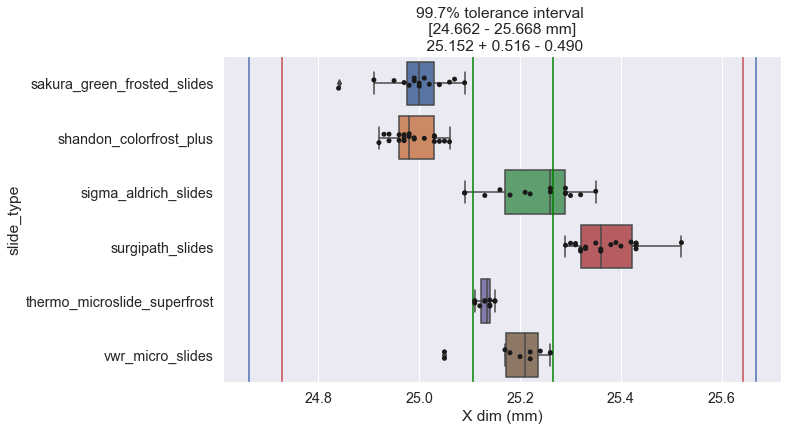

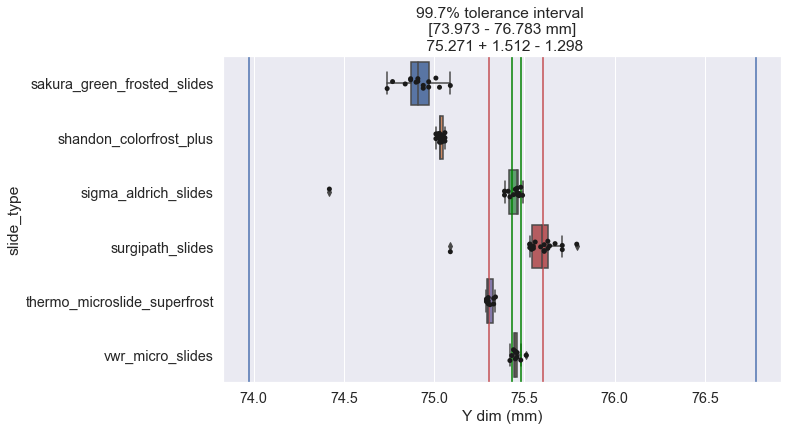

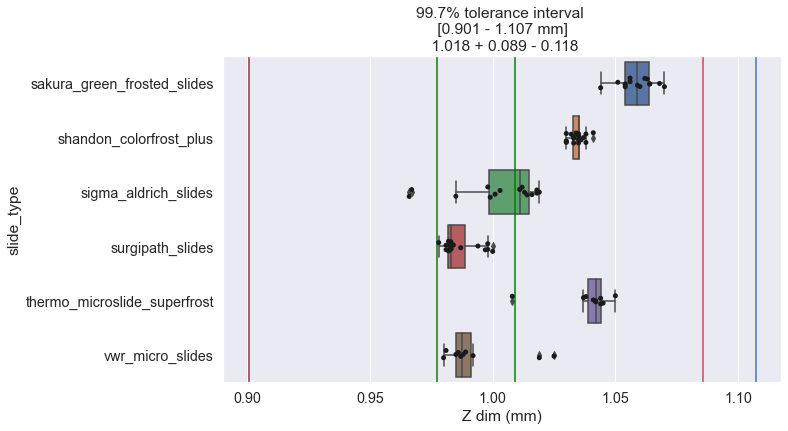

In [40]:
columns = ['X dim (mm)', 'Y dim (mm)', 'Z dim (mm)']

slides = ['vwr_micro_slides',]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='slide_type')
    sns.stripplot(data=df, x=col, y='slide_type', color='k')
    minimum = np.inf
    maximum = 0
    subset_min = np.inf
    subset_max = 0
    average = df[col].mean()
    ci_lower = 0
    ci_upper = 0
    for slide_types in df['slide_type'].unique():
        temp_df = df.loc[df['slide_type'] == slide_types].copy()
        lower, upper = tolerance_interval(temp_df[col], cov=.9997)
        if lower < minimum:
            minimum = lower
        if upper > maximum:
            maximum = upper
    for slide_types in slides:
        temp_df = df.loc[df['slide_type'] == slide_types].copy()
        lower, upper = tolerance_interval(temp_df[col], cov=.9997)
        ci_lower, ci_upper = t.interval(alpha=0.99, df=len(temp_df[col])-1, loc=np.mean(temp_df[col]), scale=sem((temp_df[col])))
        if lower < subset_min:
            subset_min = lower
        if upper > subset_max:
            subset_max = upper
    ax.axvline(minimum)
    ax.axvline(maximum)
    ax.axvline(ci_lower, color='green')
    ax.axvline(ci_upper, color='green')                                                                                     
    ax.axvline(subset_min, color='r')
    ax.axvline(subset_max, color='r')
    plus, minus = maximum - average, average - minimum
    ax.set(title='99.7% tolerance interval \n [{:.3f} - {:.3f} mm] \n {:.3f} + {:.3f} - {:.3f}'.format(minimum, maximum, average, plus, minus))
    plt.show

C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributi

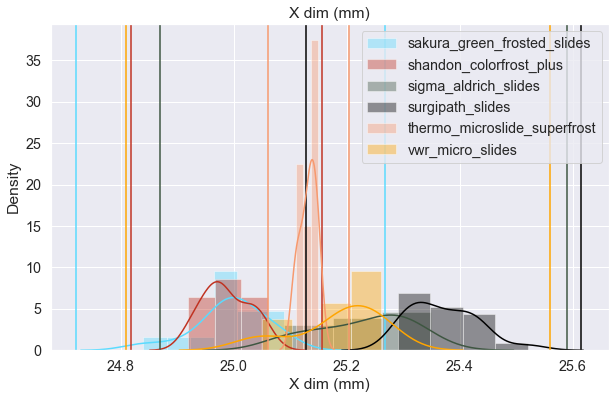

C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributi

sigma_aldrich_slides.csv Data not normal
surgipath_slides.csv Data not normal


C:\Users\eric.evje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


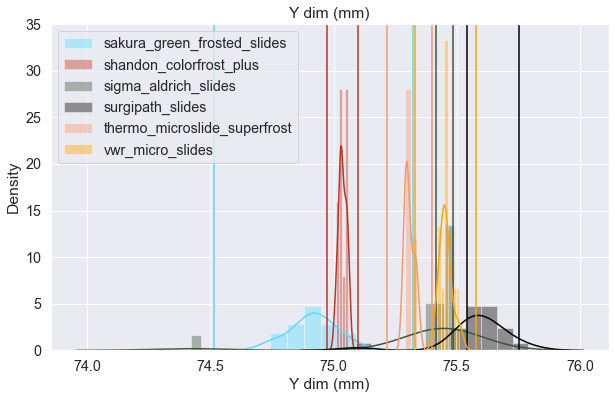

C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eric.evje\Anaconda3\lib\site-packages\seaborn\distributi

thermo_microslide_superfrost.csv Data not normal
vwr_micro_slides.csv Data not normal


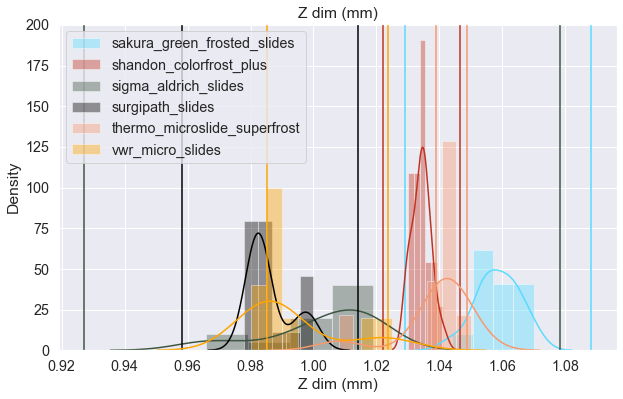

In [41]:
columns = ['X dim (mm)', 'Y dim (mm)', 'Z dim (mm)']

colors = ['#48639c', '#5adbff', '#c03221', '#3e5641', '#000000', '#f7996e', 'orange']

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    i = 0
    for file in files:
        if file.endswith('.csv'):
            i += 1
            df = pd.read_csv(file)
            try:
                data = df[col]
                sns.distplot(data, label=file[:-4], color=colors[i])
                if normaltest(data).pvalue > 0.05:
                    lbnd, ubnd = tolerance_interval(data, cov=.997)
                else:
                    print("{} Data not normal".format(file))
                    lbnd = np.quantile(data, 0.25)
                    ubnd = np.quantile(data, 0.975)
                ax.axvline(lbnd, color=colors[i])
                ax.axvline(ubnd, color=colors[i])
            except KeyError:
                pass
    ax.set(title=col)
    ax.legend()
    plt.show()